In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, log_loss
from sklearn.decomposition import PCA
%matplotlib inline


### Loading Dataset

### Dataset 1 - Train Set

In [2]:
HR_attrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
HR_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Dataset Overview

In [3]:
HR_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
HR_attrition_overview = pd.DataFrame(HR_attrition.dtypes, columns = ["data_type"])
HR_attrition_overview["count"] = HR_attrition.count()
HR_attrition_overview["null_value"] = HR_attrition.isnull().sum()
HR_attrition_overview["min"] = HR_attrition.min()
HR_attrition_overview["max"] = HR_attrition.max()
HR_attrition_overview
# Using a new table to see the details in greater clarity

,data_type,count,null_value,min,max
Age,int64,1470,0,18,60
Attrition,object,1470,0,No,Yes
BusinessTravel,object,1470,0,Non-Travel,Travel_Rarely
DailyRate,int64,1470,0,102,1499
Department,object,1470,0,Human Resources,Sales
DistanceFromHome,int64,1470,0,1,29
Education,int64,1470,0,1,5
EducationField,object,1470,0,Human Resources,Technical Degree
EmployeeCount,int64,1470,0,1,1
EmployeeNumber,int64,1470,0,1,2068


### Checking all variables of each column

In [6]:
all_column = list(HR_attrition)

for c in all_column:
    print (c)
    print (HR_attrition[c].value_counts())
    print ('')


Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

DailyRate
691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5     

No     1233
Yes     237
Name: Attrition, dtype: int64
16.1%


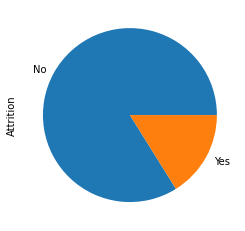

In [7]:
Attrition_count = HR_attrition.Attrition.value_counts()
Attrition_percentage = round(Attrition_count[1]/sum(Attrition_count) * 100, 1)

Attrition_count.plot.pie()

print (Attrition_count)
print (str(Attrition_percentage) + '%')

### Data Exploration

- There is no empty cells and the data category is clean
- Imbalance class
> For the target data, 16.1% of the dataset is attrition whereas 83.9% of the dataset is still currently employed by the company. I will stratify the train test and use weight adjusting techniques to prevent biasness.

- Selection of encoding
> I will use 3 types of encoding, frequency, ordinal and standard scaler

- Removal of columns
>- removed DailyRate and HourlyRate as it is covered in the MonthlyRate (Duplication)
>- removed Over18 as it is covered in Age (Duplication)
>- removed EmployeeCount and EmployeeNumber as it is no material effect
>- removed StandardHours as it is 80 for everyone and hence no material effect
>- removed Attrition so that I can use a loop for charting
 

In [8]:
all_column = list(HR_attrition)

print (len(all_column))
all_column


35


['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
remove_column = ['DailyRate', 'HourlyRate', 'Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Attrition']

for i in remove_column:
    all_column.remove(i)

print (len(all_column))
all_column

28


['Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Age


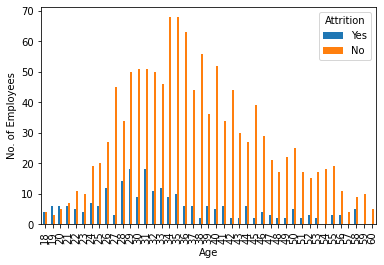

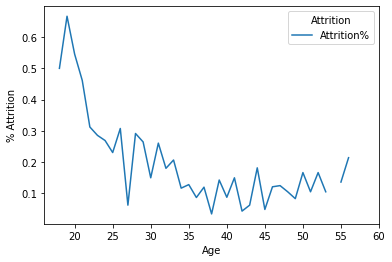

BusinessTravel


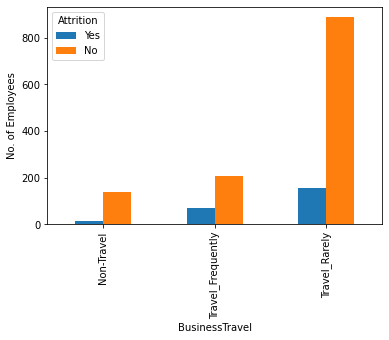

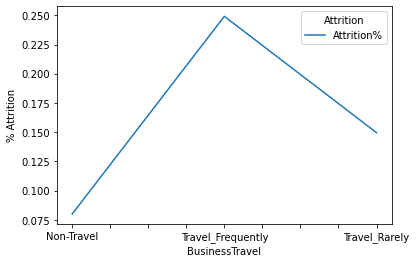

Department


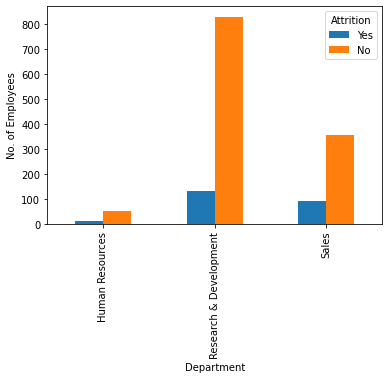

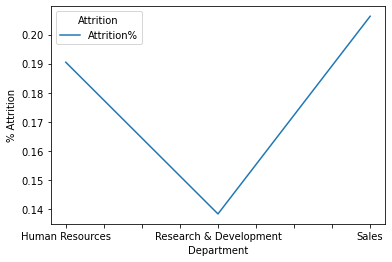

DistanceFromHome


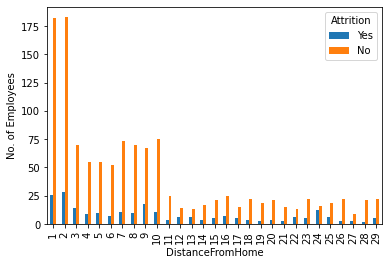

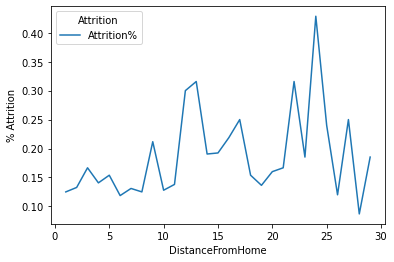

Education


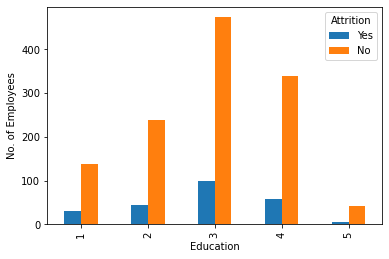

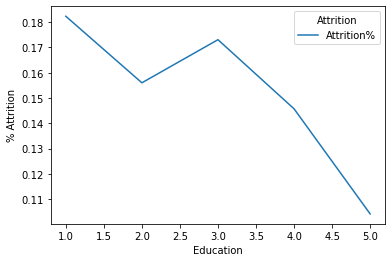

EducationField


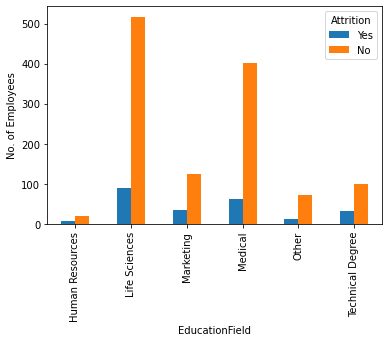

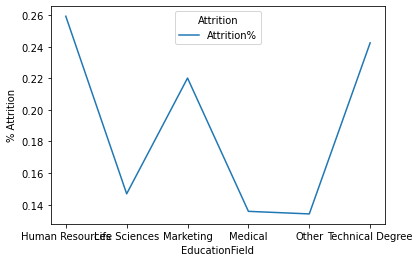

EnvironmentSatisfaction


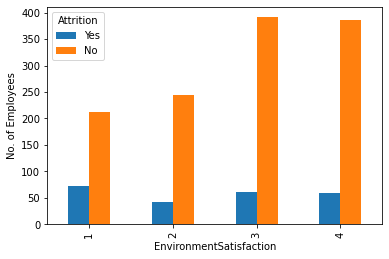

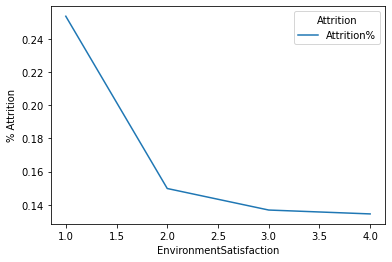

Gender


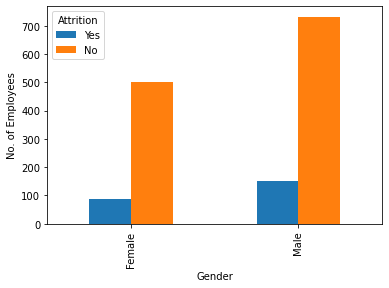

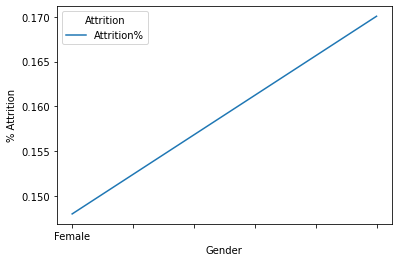

JobInvolvement


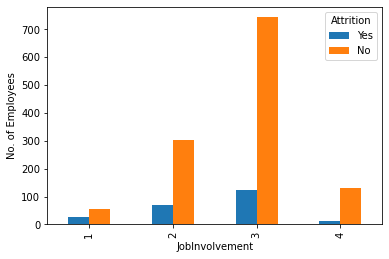

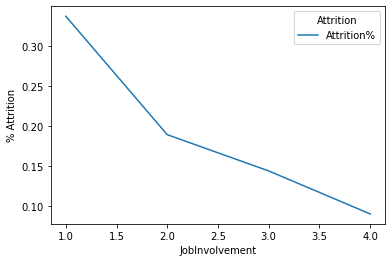

JobLevel


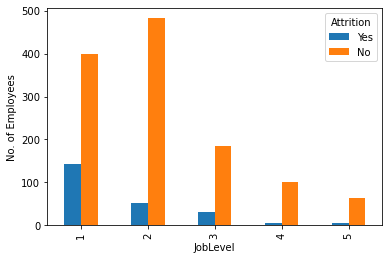

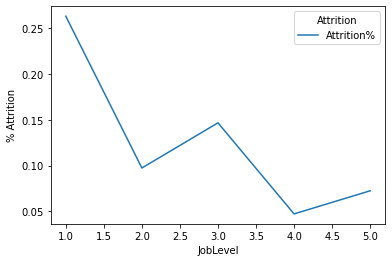

JobRole


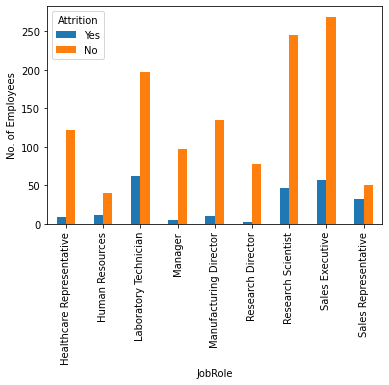

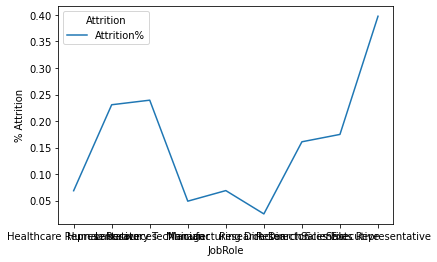

JobSatisfaction


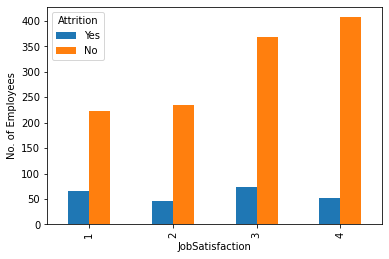

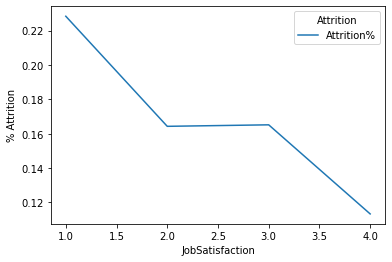

MaritalStatus


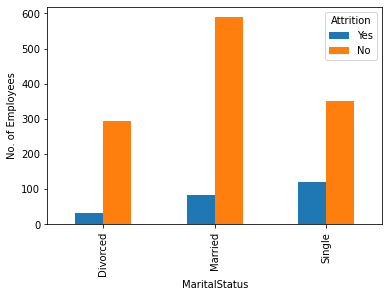

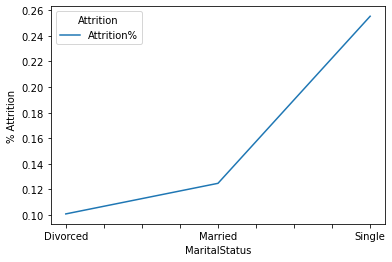

MonthlyIncome


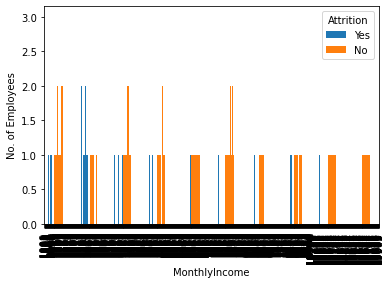

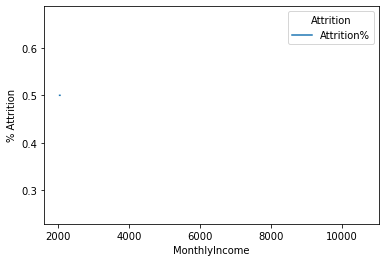

MonthlyRate


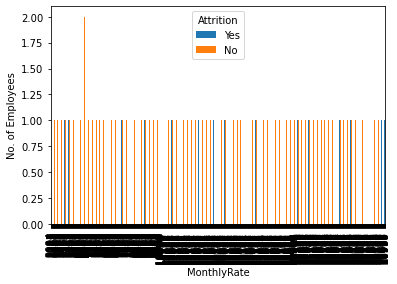

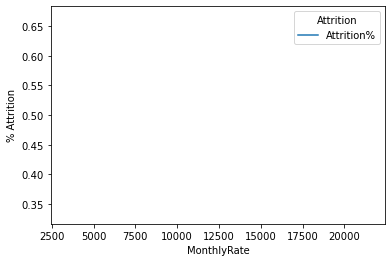

NumCompaniesWorked


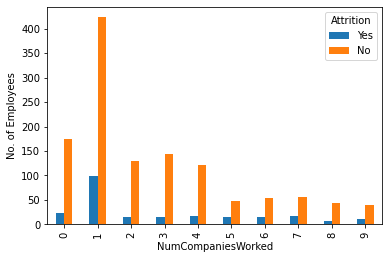

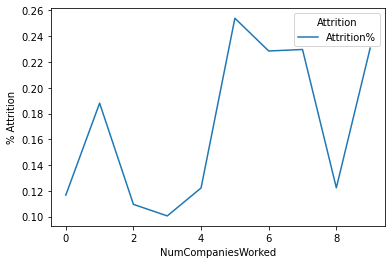

OverTime


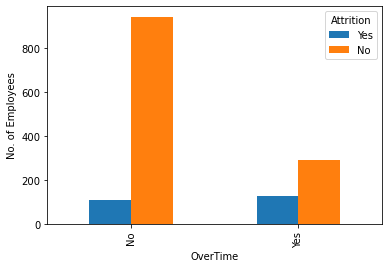

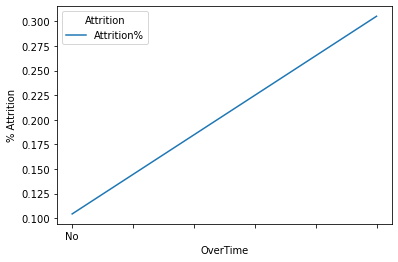

PercentSalaryHike


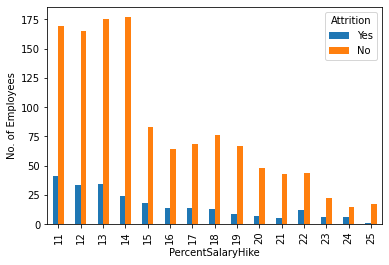

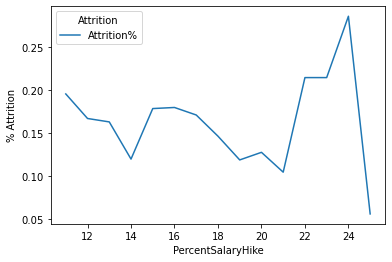

PerformanceRating


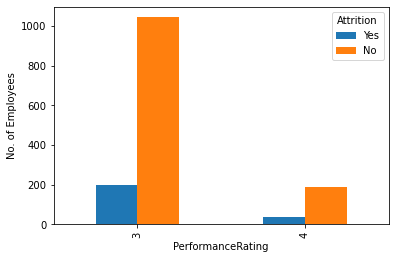

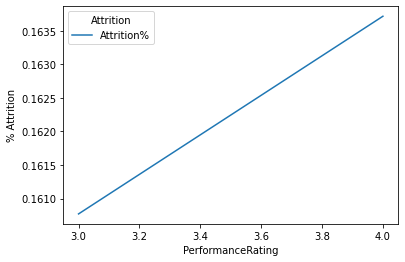

RelationshipSatisfaction


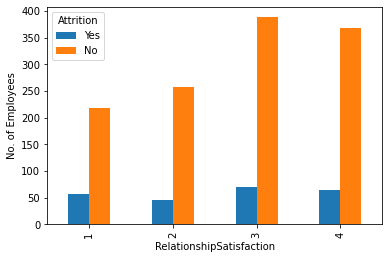

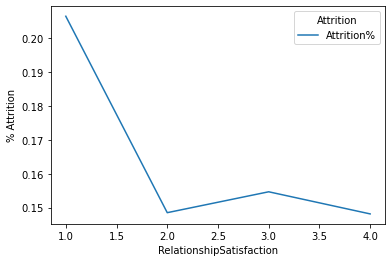

StockOptionLevel


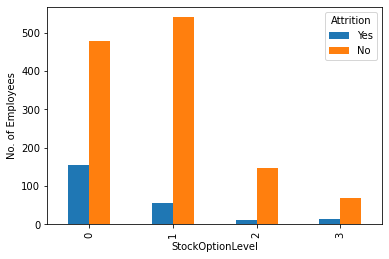

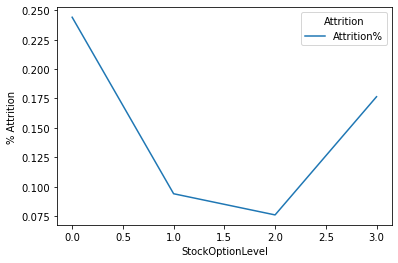

TotalWorkingYears


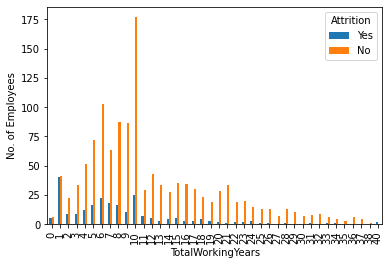

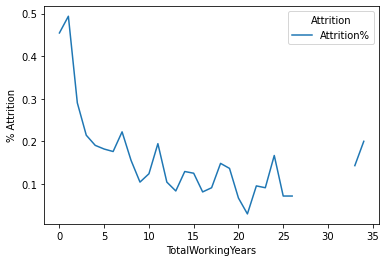

TrainingTimesLastYear


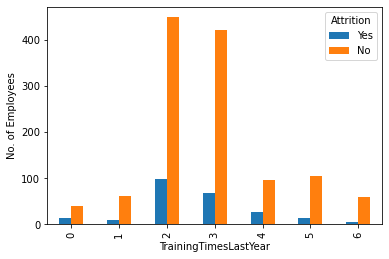

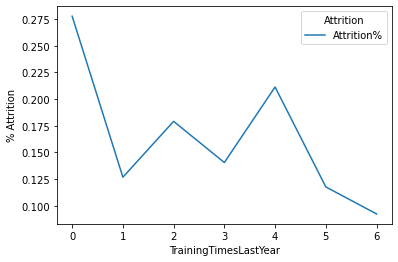

WorkLifeBalance


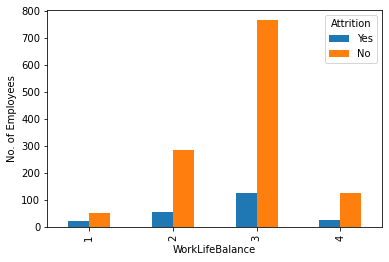

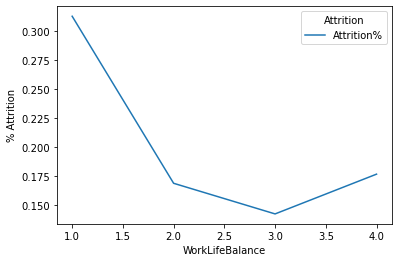

YearsAtCompany


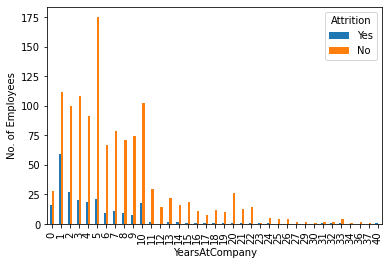

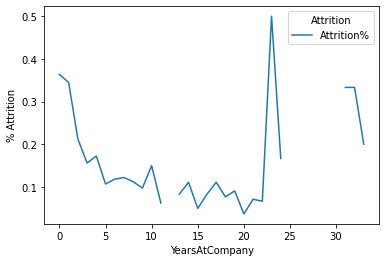

YearsInCurrentRole


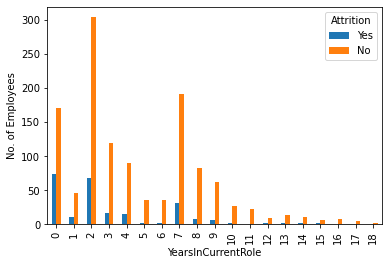

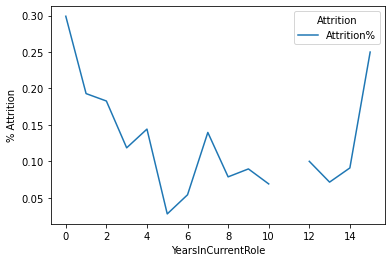

YearsSinceLastPromotion


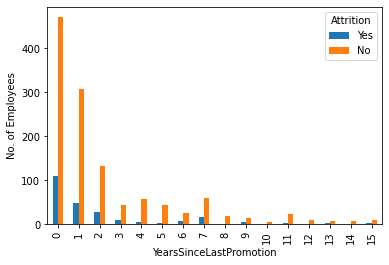

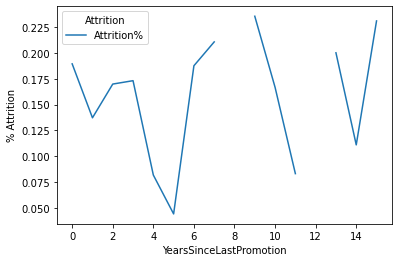

YearsWithCurrManager


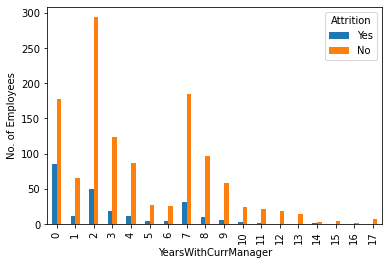

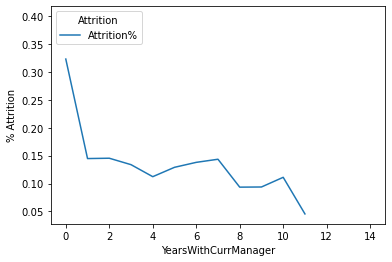

In [10]:
for i in all_column:
    print (i)
    c_attrition = HR_attrition.groupby(['Attrition'])[i].value_counts().unstack('Attrition')
    c_attrition['Attrition%'] = c_attrition['Yes']/(c_attrition['Yes'] + c_attrition['No'])
    c_attrition[['Yes', 'No']].plot(kind='bar', xlabel = i, ylabel = 'No. of Employees')
    c_attrition[['Attrition%']].plot(kind='line', xlabel = i, ylabel = '% Attrition')
    plot.show()


### Overall Observations

#### Visible trends (Likely to leave)
- Male employees 
- Singles (Significant)
- Age 25 and below (Significant)
- Those who is working for less then 2 years in total (Significant)
- Those who is working for less then 2 years in the company (Significant)
- Those who is holding the same role for less then 2 years in the company (Significant)
- Less then 1 year with current manager (Significant)
- Sales team
- Overtime (Significant)
- Employees whos travels frequently
- Employees with Low (Code 1) EnvironmentSatisfaction (Significant)
- Employees with Low (Code 1) JobInvolvement (Significant)
- Employees with Low (Code 1) JobLevel (Significant)
- Employees with Low (Code 1) JobSatisfaction (Significant)
- Employees with Low (Code 1) RelationshipSatisfaction (Significant)
- Employees with Low (Code 1) StockOptionLevel (Significant)
- Employees with Low (Code 1) WorkLifeBalance (Significant)


#### Visible trends (Likely to stay)
- Employees whos education level is Collage (code 2), master (code 4) and Doctorate (code 5)
- Employees educated in Life Sciences and Medical (Significant)

#### No visible trend
- Distance from home
- No of companies worked
- PercentSalaryHike
- PerformanceRating
- TrainingTimesLastYear
- YearsSinceLastPromotion

#### Unreadable chart
- MonthlyIncome
- MonthlyRate


MonthlyIncome


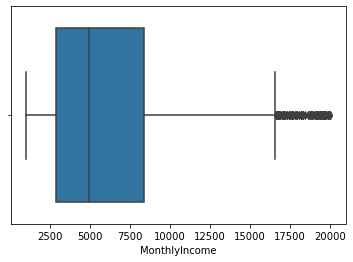

MonthlyRate


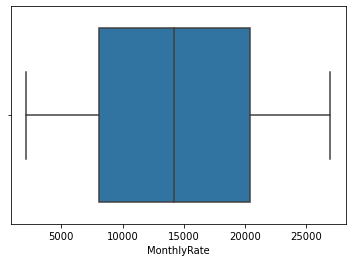

In [11]:
column_with_wide_range = ['MonthlyIncome', 'MonthlyRate']

for cw in column_with_wide_range:
    print (cw)
    sns.boxplot(x = HR_attrition[cw])
    plot.show()


Key observation 
- There is some outliers for MonthlyIncome but there isn't for MonthlyRate, the company could have adjusted based off other cost such as rental, taxes and such

### Data Encoding

- After exploring the data, I will be using 3 different type of encoding for different columns

| Frequency Encoding | Ordinal Encoding | Standard Scaler | No Change |
| --- | --- | --- | --- | 
| Department | Attrition (Label) | Age | Education | 
| EducationField | BusinessTravel | DistanceFromHome | EnvironmentSatisfaction | 
| Gender | OverTime | MonthlyRate | JobInvolvement | 
| JobRole |  | NumCompaniesWorked | JobSatisfaction |
| MaritalStatus |  | PercentSalaryHike | PerformanceRating |
|  |  | TrainingTimesLastYear | RelationshipSatisfaction |
|  |  | TotalWorkingYears | StockOptionLevel |
|  |  | YearsAtCompany | WorkLifeBalance |
|  |  | YearsInCurrentRole |  |
|  |  | YearsSinceLastPromotion |  |
|  |  | YearsWithCurrManager |  |
|  |  | JobLevel |  |
|  |  | MonthlyIncome |  |


#### Frequency encoding via a loop

In [14]:
freq_encode = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

for i in freq_encode:
    counts = HR_attrition[i].value_counts()
    encoding = counts/len(HR_attrition)
    HR_attrition['freq_encoded_'+i] = HR_attrition[i].map(encoding) 

#### Ordinal encoding

In [15]:
y = [['No', 'Yes']]
encoder = OrdinalEncoder(y)
HR_attrition['ordinal_encoded_Attrition'] = encoder.fit_transform(np.array(HR_attrition.Attrition).reshape(-1,1))

y = [['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]
encoder = OrdinalEncoder(y)
HR_attrition['ordinal_encoded_BusinessTravel'] = encoder.fit_transform(np.array(HR_attrition.BusinessTravel).reshape(-1,1))

y = [['No', 'Yes']]
encoder = OrdinalEncoder(y)
HR_attrition['ordinal_encoded_OverTime'] = encoder.fit_transform(np.array(HR_attrition.OverTime).reshape(-1,1))


/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass categories=[['No', 'Yes']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass categories=[['No', 'Yes']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


#### Standard Scaler encoding via a loop

In [16]:
stand_scale_encode = ['Age', 'JobLevel', 'MonthlyIncome', 'DistanceFromHome', 'MonthlyRate', 
                      'NumCompaniesWorked', 'PercentSalaryHike', 'TrainingTimesLastYear', 'TotalWorkingYears', 
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in stand_scale_encode:
    standard_scale = StandardScaler()
    HR_attrition['standardscale_encoded_'+i] = standard_scale.fit_transform(HR_attrition[[i]])


In [17]:
HR_attrition_overview2 = pd.DataFrame(HR_attrition.dtypes, columns = ["data_type"])
HR_attrition_overview2["count"] = HR_attrition.count()
HR_attrition_overview2["null_value"] = HR_attrition.isnull().sum()
HR_attrition_overview2["min"] = HR_attrition.min()
HR_attrition_overview2["max"] = HR_attrition.max()
HR_attrition_overview2
# Using a new table to see the details in greater clarity

,data_type,count,null_value,min,max
Age,int64,1470,0,18,60
Attrition,object,1470,0,No,Yes
BusinessTravel,object,1470,0,Non-Travel,Travel_Rarely
DailyRate,int64,1470,0,102,1499
Department,object,1470,0,Human Resources,Sales
DistanceFromHome,int64,1470,0,1,29
Education,int64,1470,0,1,5
EducationField,object,1470,0,Human Resources,Technical Degree
EmployeeCount,int64,1470,0,1,1
EmployeeNumber,int64,1470,0,1,2068


In [18]:
list(HR_attrition)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Ordinal_Code_Attrition',
 'freq_encoded_Department',
 'freq_encoded_EducationField',
 'freq_encoded_Gender',
 'freq_encoded_JobRole',
 'freq_encoded_MaritalStatus',
 'ordinal_encoded_Attrition',
 'ordinal_encoded_BusinessTravel',
 'ordinal_encoded_OverTime',
 'standardscale_encoded_Age',
 'standardscale_encoded_JobLevel',
 'standardscale_encod

### Machine Learning Setup

In [19]:
feature_columns = ['freq_encoded_Department', 'freq_encoded_EducationField', 'freq_encoded_Gender',
                   'freq_encoded_JobRole', 'freq_encoded_MaritalStatus', 'ordinal_encoded_BusinessTravel',
                   'ordinal_encoded_OverTime', 'standardscale_encoded_Age', 'standardscale_encoded_JobLevel',
                   'standardscale_encoded_MonthlyIncome', 'standardscale_encoded_DistanceFromHome',
                   'standardscale_encoded_MonthlyRate', 'standardscale_encoded_NumCompaniesWorked',
                   'standardscale_encoded_PercentSalaryHike', 'standardscale_encoded_TrainingTimesLastYear',
                   'standardscale_encoded_TotalWorkingYears', 'standardscale_encoded_YearsAtCompany',
                   'standardscale_encoded_YearsInCurrentRole', 'standardscale_encoded_YearsSinceLastPromotion',
                   'standardscale_encoded_YearsWithCurrManager', 'Education', 'EnvironmentSatisfaction', 
                   'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
                   'StockOptionLevel', 'WorkLifeBalance']

X = HR_attrition[feature_columns] 
y = HR_attrition['ordinal_encoded_Attrition']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Trying baseline model
- KNN (K nearest neighbour)
- RF (Random foreest)
- LR (Logistic regression)
- SVM (Support vector machine)
- Gradient Boosting
- Adaboost
- Naive Bayes

In [21]:
test_set_ml = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score', 
                                    'True positive', 'False positive', 'False negative', 'True negative'])

test_model_ml = {'KNN':KNeighborsClassifier(), 'RF':RandomForestClassifier(class_weight = {0: 1, 1: 5.21}), 'LR':LogisticRegression(class_weight = {0: 1, 1: 5.21}), 
              'SVC':SVC(probability=True, class_weight = {0: 1, 1: 5.21}), 'GB':GradientBoostingClassifier(), 'Adaboost':AdaBoostClassifier(), 'NB':GaussianNB()}

counter = 0
for n, m in test_model_ml.items():
    threshold = 0.5
    base_model = m.fit(X_train, y_train)
    model_result = base_model.predict_proba(X_test)
    predicted = (model_result [:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted)
    test_set_ml.loc[counter, :] = n, roc_auc_score(y_test , predicted), log_loss(y_test, predicted), \
                            accuracy_score(y_test,predicted), precision_score(y_test,predicted), \
                            recall_score(y_test,predicted), f1_score(y_test,predicted), cm[0][0], \
                            cm[0][1], cm[1][0], cm[1][1]
                                                                    
    counter += 1

print (test_set_ml)

/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


      model       roc   logloss  accuracy precision    recall  f1_score  \
0       KNN  0.568912  5.521527  0.840136       0.5  0.170213  0.253968   
1        RF  0.539021  5.756482  0.833333  0.416667  0.106383  0.169492   
2        LR  0.750883  8.458639  0.755102  0.368421  0.744681  0.492958   
3       SVC  0.679344  4.111775  0.880952      0.75  0.382979  0.507042   
4        GB  0.596262  4.934125  0.857143  0.666667  0.212766  0.322581   
5  Adaboost  0.630718  4.934135  0.857143  0.608696  0.297872       0.4   
6        NB  0.691102  8.928549  0.741497  0.333333  0.617021  0.432836   

  True positive False positive False negative True negative  
0           239              8             39             8  
1           240              7             42             5  
2           187             60             12            35  
3           241              6             29            18  
4           242              5             37            10  
5           238            

In [22]:
test_set_ml2 = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score', 
                                    'True positive', 'False positive', 'False negative', 'True negative'])

test_model_ml2 = {'KNN':KNeighborsClassifier(), 'RF':RandomForestClassifier(class_weight = {0: 1, 1: 5.21}), 'LR':LogisticRegression(class_weight = {0: 1, 1: 5.21}), 
              'SVC':SVC(probability=True, class_weight = {0: 1, 1: 5.21}), 'GB':GradientBoostingClassifier(), 'Adaboost':AdaBoostClassifier(), 'NB':GaussianNB()}

counter = 0
for n, m in test_model_ml2.items():
    threshold = 0.18
    base_model = m.fit(X_train, y_train)
    model_result = base_model.predict_proba(X_test)
    predicted = (model_result [:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted)
    test_set_ml2.loc[counter, :] = n, roc_auc_score(y_test , predicted), log_loss(y_test, predicted), \
                            accuracy_score(y_test,predicted), precision_score(y_test,predicted), \
                            recall_score(y_test,predicted), f1_score(y_test,predicted), cm[0][0], \
                            cm[0][1], cm[1][0], cm[1][1]
                                                                    
    counter += 1

print (test_set_ml2)


/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


      model       roc    logloss  accuracy precision    recall  f1_score  \
0       KNN  0.623826  14.332708  0.585034  0.230216  0.680851  0.344086   
1        RF  0.754932   8.223676  0.761905  0.376344  0.744681       0.5   
2        LR  0.658369  18.327114  0.469388   0.22335   0.93617  0.360656   
3       SVC  0.720992   8.693594  0.748299  0.351648  0.680851  0.463768   
4        GB  0.785813   6.931382   0.79932  0.428571  0.765957  0.549618   
5  Adaboost       0.5  29.017943  0.159864  0.159864       1.0   0.27566   
6        NB  0.660823  14.685167   0.57483  0.243421  0.787234  0.371859   

  True positive False positive False negative True negative  
0           140            107             15            32  
1           189             58             12            35  
2            94            153              3            44  
3           188             59             15            32  
4           199             48             11            36  
5             0    

### Review

Initial data is acceptable as the ROC for the top 3 models is between 0.66-0.69. After some consultation and research, the recommendation is to adjust the threshold so that the ROC would be higher. Much more research was done in order to make the threshold coding to work in the loop for code efficiency

Also, I will take a higher recall vs a higher precision as it is better to reach out to more customers then to lose a potential qualified leads. There is also a consideration to balance the output to prevent excessive work 

Exploring threshold for 0.8, 0.6, 0.15, 0.16, 0.17, 0.18, 0.19, in that respective order returns the best ROC at 0.18

False negative and True negative both improves with the top 3 models improving to 0.74-0.79

### Checking for correlations

In [27]:
corr_test = HR_attrition[['freq_encoded_Department', 'freq_encoded_EducationField', 'freq_encoded_Gender',
                   'freq_encoded_JobRole', 'freq_encoded_MaritalStatus', 'ordinal_encoded_BusinessTravel',
                   'ordinal_encoded_OverTime', 'standardscale_encoded_Age', 'standardscale_encoded_JobLevel',
                   'standardscale_encoded_MonthlyIncome', 'standardscale_encoded_DistanceFromHome',
                   'standardscale_encoded_MonthlyRate', 'standardscale_encoded_NumCompaniesWorked',
                   'standardscale_encoded_PercentSalaryHike', 'standardscale_encoded_TrainingTimesLastYear',
                   'standardscale_encoded_TotalWorkingYears', 'standardscale_encoded_YearsAtCompany',
                   'standardscale_encoded_YearsInCurrentRole', 'standardscale_encoded_YearsSinceLastPromotion',
                   'standardscale_encoded_YearsWithCurrManager', 'Education', 'EnvironmentSatisfaction', 
                   'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
                   'StockOptionLevel', 'WorkLifeBalance', 'ordinal_encoded_Attrition']]


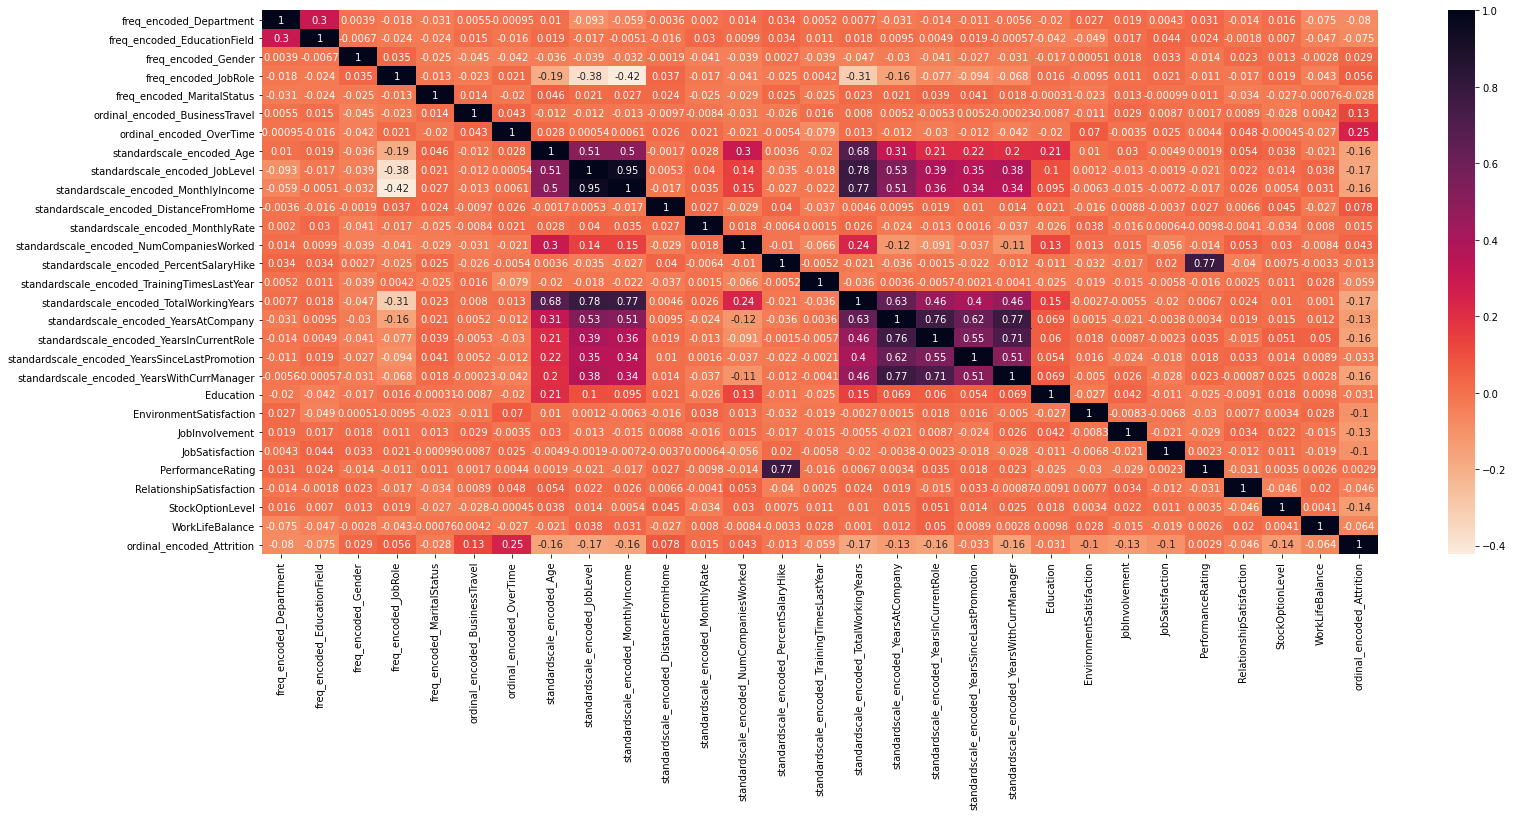

In [28]:
fig, ax = plot.subplots(figsize=(25,10))
corrMatrix = corr_test.corr()
sns.heatmap(corrMatrix, annot=True, cmap = sns.cm.rocket_r)
plot.show()

### Observation 

- High correlation is found between TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager, JobLevel, MonthlyIncome and Age

### Exploring dimension reduction using PCA

To prevent losing too much data, will explore feature reduction into 3 groups. 

Time-based Factor
>- TotalWorkingYears
>- YearsAtCompany
>- YearsInCurrentRole
>- YearsSinceLastPromotion
>- YearsWithCurrentManager
 
 
Age-Based Factor
>- JobLevel
>- MonthlyIncome
>- Age


Performances-Based Factor
>- PerformanceRating
>- PercentSalaryHike


#### Age-based factors

In [29]:
pca = PCA(n_components=1)
ageComponents = pca.fit_transform(HR_attrition[['Age', 
                                                'JobLevel', 
                                                'MonthlyIncome']])
ageDf = pd.DataFrame(data = ageComponents
             , columns = ['age-based-factors'])

ageDf


,age-based-factors
0,-509.927118
1,-1372.918966
2,-4412.929287
3,-3593.933554
4,-3034.939625
...,...
1465,-3931.930266
1466,3488.069208
1467,-360.940716
1468,-1112.919094


#### Time-based factors

In [30]:
pca = PCA(n_components=1)
timeComponents = pca.fit_transform(HR_attrition[['TotalWorkingYears', 
                                                 'YearsAtCompany', 
                                                 'YearsInCurrentRole', 
                                                 'YearsSinceLastPromotion', 
                                                 'YearsWithCurrManager']])
timeDf = pd.DataFrame(data = timeComponents
             , columns = ['time-based-factors'])

timeDf


,time-based-factors
0,-3.168403
1,2.017875
2,-9.614857
3,-1.967758
4,-7.747174
...,...
1465,1.624569
1466,-0.364465
1467,-5.659052
1468,6.245216


####  Performances-based factors

In [31]:
pca = PCA(n_components=1)
performancesComponents = pca.fit_transform(HR_attrition[['PercentSalaryHike', 
                                                         'PerformanceRating']])
performancesDf = pd.DataFrame(data = performancesComponents
             , columns = ['performances-based-factors'])

performancesDf

,performances-based-factors
0,-4.208977
1,7.832345
2,-0.220648
3,-4.208977
4,-3.211895
...,...
1465,1.773516
1466,-0.220648
1467,4.841098
1468,-1.217731


#### Creating a new database to store the results from the 3 dimension reduction exercise above

In [32]:
pcaDf = pd.concat([ageDf, timeDf, performancesDf], axis = 1)
pcaDf


,age-based-factors,time-based-factors,performances-based-factors
0,-509.927118,-3.168403,-4.208977
1,-1372.918966,2.017875,7.832345
2,-4412.929287,-9.614857,-0.220648
3,-3593.933554,-1.967758,-4.208977
4,-3034.939625,-7.747174,-3.211895
...,...,...,...
1465,-3931.930266,1.624569,1.773516
1466,3488.069208,-0.364465,-0.220648
1467,-360.940716,-5.659052,4.841098
1468,-1112.919094,6.245216,-1.217731


#### Encoding for the new dataset

In [33]:
stand_scale_encode_pca = ['age-based-factors', 'time-based-factors','performances-based-factors']

for i in stand_scale_encode_pca:
    standard_scale = StandardScaler()
    pcaDf['standardscale_encoded_'+i] = standard_scale.fit_transform(pcaDf[[i]])

In [54]:
#checking dataset
pcaDf

,age-based-factors,time-based-factors,performances-based-factors,standardscale_encoded_age-based-factors,standardscale_encoded_time-based-factors,standardscale_encoded_performances-based-factors
0,-509.927118,-3.168403,-4.208977,-0.108349,-0.322816,-1.147061
1,-1372.918966,2.017875,7.832345,-0.291716,0.205594,2.134527
2,-4412.929287,-9.614857,-0.220648,-0.937653,-0.979621,-0.060133
3,-3593.933554,-1.967758,-4.208977,-0.763634,-0.200487,-1.147061
4,-3034.939625,-7.747174,-3.211895,-0.644860,-0.789330,-0.875329
...,...,...,...,...,...,...
1465,-3931.930266,1.624569,1.773516,-0.835451,0.165521,0.483331
1466,3488.069208,-0.364465,-0.220648,0.741140,-0.037134,-0.060133
1467,-360.940716,-5.659052,4.841098,-0.076692,-0.576579,1.319331
1468,-1112.919094,6.245216,-1.217731,-0.236471,0.636301,-0.331865


#### Merging with the main dataset

In [35]:
pca_combine_Df = pd.concat([pcaDf, HR_attrition], axis = 1)
pca_combine_Df


,age-based-factors,time-based-factors,performances-based-factors,standardscale_encoded_age-based-factors,standardscale_encoded_time-based-factors,standardscale_encoded_performances-based-factors,Age,Attrition,BusinessTravel,DailyRate,...,standardscale_encoded_DistanceFromHome,standardscale_encoded_MonthlyRate,standardscale_encoded_NumCompaniesWorked,standardscale_encoded_PercentSalaryHike,standardscale_encoded_TrainingTimesLastYear,standardscale_encoded_TotalWorkingYears,standardscale_encoded_YearsAtCompany,standardscale_encoded_YearsInCurrentRole,standardscale_encoded_YearsSinceLastPromotion,standardscale_encoded_YearsWithCurrManager
0,-509.927118,-3.168403,-4.208977,-0.108349,-0.322816,-1.147061,41,Yes,Travel_Rarely,1102,...,-1.010909,0.726020,2.125136,-1.150554,-2.171982,-0.421642,-0.164613,-0.063296,-0.679146,0.245834
1,-1372.918966,2.017875,7.832345,-0.291716,0.205594,2.134527,49,No,Travel_Frequently,279,...,-0.147150,1.488876,-0.678049,2.129306,0.155707,-0.164511,0.488508,0.764998,-0.368715,0.806541
2,-4412.929287,-9.614857,-0.220648,-0.937653,-0.979621,-0.060133,37,Yes,Travel_Rarely,1373,...,-0.887515,-1.674841,1.324226,-0.057267,0.155707,-0.550208,-1.144294,-1.167687,-0.679146,-1.155935
3,-3593.933554,-1.967758,-4.208977,-0.763634,-0.200487,-1.147061,33,No,Travel_Frequently,1392,...,-0.764121,1.243211,-0.678049,-1.150554,0.155707,-0.421642,0.161947,0.764998,0.252146,-1.155935
4,-3034.939625,-7.747174,-3.211895,-0.644860,-0.789330,-0.875329,27,No,Travel_Rarely,591,...,-0.887515,0.325900,2.525591,-0.877232,0.155707,-0.678774,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-3931.930266,1.624569,1.773516,-0.835451,0.165521,0.483331,36,No,Travel_Frequently,884,...,1.703764,-0.284329,0.523316,0.489376,0.155707,0.735447,-0.327893,-0.615492,-0.679146,-0.314873
1466,3488.069208,-0.364465,-0.220648,0.741140,-0.037134,-0.060133,39,No,Travel_Rarely,613,...,-0.393938,1.004010,0.523316,-0.057267,1.707500,-0.293077,-0.001333,0.764998,-0.368715,0.806541
1467,-360.940716,-5.659052,4.841098,-0.076692,-0.576579,1.319331,27,No,Travel_Rarely,155,...,-0.640727,-1.284418,-0.678049,1.309341,-2.171982,-0.678774,-0.164613,-0.615492,-0.679146,-0.314873
1468,-1112.919094,6.245216,-1.217731,-0.236471,0.636301,-0.331865,49,No,Travel_Frequently,1023,...,-0.887515,-0.150393,-0.277594,-0.330589,0.155707,0.735447,0.325228,0.488900,-0.679146,1.086895


In [36]:
list(pca_combine_Df)

['age-based-factors',
 'time-based-factors',
 'performances-based-factors',
 'standardscale_encoded_age-based-factors',
 'standardscale_encoded_time-based-factors',
 'standardscale_encoded_performances-based-factors',
 'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Ordinal_Code_Attrition',
 'freq_encoded_Department',
 'freq_encoded_EducationField',
 'freq_encoded_Gender',
 'freq_encoded_Job

## 2nd attempt at baseline model

In [55]:
feature_columns2 = ['standardscale_encoded_age-based-factors', 'standardscale_encoded_time-based-factors',
                    'standardscale_encoded_performances-based-factors', 'freq_encoded_Department', 
                    'freq_encoded_EducationField', 'freq_encoded_Gender', 'freq_encoded_JobRole', 
                    'freq_encoded_MaritalStatus', 'ordinal_encoded_BusinessTravel', 'ordinal_encoded_OverTime', 
                    'standardscale_encoded_DistanceFromHome', 'standardscale_encoded_MonthlyRate', 
                    'standardscale_encoded_NumCompaniesWorked', 'standardscale_encoded_TrainingTimesLastYear',
                    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

X = pca_combine_Df[feature_columns2] 
y = pca_combine_Df['ordinal_encoded_Attrition']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [57]:
test_set_ml3 = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score', 
                                    'True positive', 'False positive', 'False negative', 'True negative'])

test_model_ml3 = {'KNN':KNeighborsClassifier(), 'RF':RandomForestClassifier(class_weight = {0: 1, 1: 5.21}), 'LR':LogisticRegression(class_weight = {0: 1, 1: 5.21}), 
              'SVC':SVC(probability=True, class_weight = {0: 1, 1: 5.21}), 'GB':GradientBoostingClassifier(), 'Adaboost':AdaBoostClassifier(), 'NB':GaussianNB()}

counter = 0
for n, m in test_model_ml3.items():
    threshold = 0.5
    base_model = m.fit(X_train, y_train)
    model_result = base_model.predict_proba(X_test)
    predicted = (model_result [:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted)
    test_set_ml3.loc[counter, :] = n, roc_auc_score(y_test , predicted), log_loss(y_test, predicted), \
                            accuracy_score(y_test,predicted), precision_score(y_test,predicted), \
                            recall_score(y_test,predicted), f1_score(y_test,predicted), cm[0][0], \
                            cm[0][1], cm[1][0], cm[1][1]
                                                                    
    counter += 1

print (test_set_ml3)


      model       roc   logloss  accuracy precision    recall  f1_score  \
0       KNN  0.530407  5.756479  0.833333       0.4  0.085106  0.140351   
1        RF  0.559781  5.051595  0.853741      0.75   0.12766  0.218182   
2        LR  0.761521   8.34116  0.758503     0.375  0.765957  0.503497   
3       SVC  0.692006  3.876815  0.887755  0.791667  0.404255  0.535211   
4        GB  0.638815  4.464209  0.870748  0.736842  0.297872  0.424242   
5  Adaboost  0.611465  5.051612  0.853741       0.6  0.255319  0.358209   
6        NB  0.701137  4.346747   0.87415   0.65625  0.446809  0.531646   

  True positive False positive False negative True negative  
0           241              6             43             4  
1           245              2             41             6  
2           187             60             11            36  
3           242              5             28            19  
4           242              5             33            14  
5           239            

In [40]:
test_set_ml4 = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score', 
                                    'True positive', 'False positive', 'False negative', 'True negative'])

test_model_ml4 = {'KNN':KNeighborsClassifier(), 'RF':RandomForestClassifier(class_weight = {0: 1, 1: 5.21}), 'LR':LogisticRegression(class_weight = {0: 1, 1: 5.21}), 
              'SVC':SVC(probability=True, class_weight = {0: 1, 1: 5.21}), 'GB':GradientBoostingClassifier(), 'Adaboost':AdaBoostClassifier(), 'NB':GaussianNB()}

counter = 0
for n, m in test_model_ml4.items():
    threshold = 0.16
    base_model = m.fit(X_train, y_train)
    model_result = base_model.predict_proba(X_test)
    predicted = (model_result [:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted)
    test_set_ml4.loc[counter, :] = n, roc_auc_score(y_test , predicted), log_loss(y_test, predicted), \
                            accuracy_score(y_test,predicted), precision_score(y_test,predicted), \
                            recall_score(y_test,predicted), f1_score(y_test,predicted), cm[0][0], \
                            cm[0][1], cm[1][0], cm[1][1]
                                                                    
    counter += 1

print (test_set_ml4)


      model       roc    logloss  accuracy precision    recall  f1_score  \
0       KNN  0.671419  12.570491  0.636054  0.265625  0.723404  0.388571   
1        RF  0.734172   8.928563  0.741497  0.350515  0.723404  0.472222   
2        LR  0.613834  20.911708  0.394558  0.200913   0.93617  0.330827   
3       SVC  0.695193  10.690783  0.690476       0.3  0.702128  0.420382   
4        GB  0.713369   7.636252  0.778912  0.381579  0.617021  0.471545   
5  Adaboost       0.5  29.017943  0.159864  0.159864       1.0   0.27566   
6        NB  0.771686    9.75095  0.717687  0.344828  0.851064  0.490798   

  True positive False positive False negative True negative  
0           153             94             13            34  
1           184             63             13            34  
2            72            175              3            44  
3           170             77             14            33  
4           200             47             18            29  
5             0    

### Observation

Logistic regression actually performs pretty well across both models with a 50% threshold. Hence doing a final test with a full dimension reduction to see how it impacts the results

### Doing a final dimension reduction with the entire dataset using PCA to check for accuracy

In [41]:
pca_entire = ['freq_encoded_Department', 'freq_encoded_EducationField', 'freq_encoded_Gender',
                   'freq_encoded_JobRole', 'freq_encoded_MaritalStatus', 'ordinal_encoded_BusinessTravel',
                   'ordinal_encoded_OverTime', 'standardscale_encoded_Age', 'standardscale_encoded_JobLevel',
                   'standardscale_encoded_MonthlyIncome', 'standardscale_encoded_DistanceFromHome',
                   'standardscale_encoded_MonthlyRate', 'standardscale_encoded_NumCompaniesWorked',
                   'standardscale_encoded_PercentSalaryHike', 'standardscale_encoded_TrainingTimesLastYear',
                   'standardscale_encoded_TotalWorkingYears', 'standardscale_encoded_YearsAtCompany',
                   'standardscale_encoded_YearsInCurrentRole', 'standardscale_encoded_YearsSinceLastPromotion',
                   'standardscale_encoded_YearsWithCurrManager', 'Education', 'EnvironmentSatisfaction', 
                   'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
                   'StockOptionLevel', 'WorkLifeBalance']


pca = PCA(n_components=1)
pca_entire_dataset = pca.fit_transform(HR_attrition[pca_entire])
pca_entire_df = pd.DataFrame(data = pca_entire_dataset
             , columns = ['entire'])


standard_scale = StandardScaler()
pca_entire_df['standardscale_encoded_entire'] = standard_scale.fit_transform(pca_entire_df)

pca_entire_df


,entire,standardscale_encoded_entire
0,-0.313222,-0.145149
1,0.592386,0.274514
2,-2.407011,-1.115419
3,-0.860671,-0.398839
4,-1.916446,-0.888089
...,...,...
1465,-0.764640,-0.354337
1466,0.813056,0.376774
1467,-1.238550,-0.573949
1468,1.011529,0.468747


In [42]:
pca_entire_combine_Df = pd.concat([pca_entire_df, HR_attrition['ordinal_encoded_Attrition']], axis = 1)
pca_entire_combine_Df.describe()

,entire,standardscale_encoded_entire,ordinal_encoded_Attrition
count,1.470000e+03,1.470000e+03,1470.000000
mean,-7.341067e-17,-3.119198e-17,0.161224
std,2.158678e+00,1.000340e+00,0.367863
min,-3.487849e+00,-1.616284e+00,0.000000
25%,-1.568439e+00,-7.268213e-01,0.000000
50%,-4.602983e-01,-2.133042e-01,0.000000
75%,1.121786e+00,5.198401e-01,0.000000
max,8.271470e+00,3.833034e+00,1.000000


In [43]:
X = pca_entire_combine_Df['standardscale_encoded_entire']
y = pca_entire_combine_Df['ordinal_encoded_Attrition']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [45]:
test_set_ml5 = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score', 
                                    'True positive', 'False positive', 'False negative', 'True negative'])

test_model_ml5 = {'KNN':KNeighborsClassifier(), 'RF':RandomForestClassifier(class_weight = {0: 1, 1: 5.21}), 'LR':LogisticRegression(class_weight = {0: 1, 1: 5.21}), 
              'SVC':SVC(probability=True, class_weight = {0: 1, 1: 5.21}), 'GB':GradientBoostingClassifier(), 'Adaboost':AdaBoostClassifier(), 'NB':GaussianNB()}

counter = 0
for n, m in test_model_ml5.items():
    threshold = 0.5
    base_model = m.fit(X_train.values.reshape(-1,1), y_train)
    model_result = base_model.predict_proba(X_test.values.reshape(-1,1))
    predicted = (model_result [:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted)
    test_set_ml5.loc[counter, :] = n, roc_auc_score(y_test , predicted), log_loss(y_test, predicted), \
                            accuracy_score(y_test,predicted), precision_score(y_test,predicted), \
                            recall_score(y_test,predicted), f1_score(y_test,predicted), cm[0][0], \
                            cm[0][1], cm[1][0], cm[1][1]
                                                                    
    counter += 1

print (test_set_ml5)

/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


      model       roc    logloss  accuracy precision    recall  f1_score  \
0       KNN  0.546128   6.343895  0.816327  0.333333  0.148936  0.205882   
1        RF  0.555302   8.811024  0.744898  0.240741  0.276596  0.257426   
2        LR  0.568654  17.034781  0.506803   0.19375  0.659574  0.299517   
3       SVC       0.5   5.521505  0.840136       0.0       0.0       0.0   
4        GB  0.515721   6.108921  0.823129  0.272727   0.06383  0.103448   
5  Adaboost  0.542079   6.578858  0.809524  0.304348  0.148936       0.2   
6        NB       0.5   5.521505  0.840136       0.0       0.0       0.0   

  True positive False positive False negative True negative  
0           233             14             40             7  
1           206             41             34            13  
2           118            129             16            31  
3           247              0             47             0  
4           239              8             44             3  
5           231    

/Users/Casper/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Observation

Results is bad, not a good idea to do a full reduction

### Top 4 Models

| model | Threshold | roc | logloss | accuracy | precision | recall | f1_score | TruePos | FalsePos | FalseNeg | TrueNeg | PCA |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| LR | 0.5 | 0.751 | 8.46 | 0.755 | 0.368 | 0.745 | 0.493 | 187 | 60 | 12 | 35 | No |
| GB | 0.18 | 0.786 | 6.93 | 0.799 | 0.429 | 0.766 | 0.55 | 199 | 48 | 11 | 36 | No |
| LR | 0.5 | 0.762 | 8.34 | 0.759 | 0.375 | 0.766 | 0.503 | 187 | 60 | 11 | 36 | Yes |
| NB | 0.16 | 0.772 | 9.75 | 0.718 | 0.345 | 0.851 | 0.491 | 171 | 76 | 7 | 40 | Yes |


### Gradient Boosting - Hyperparameter tuning

In [76]:
base_model_gb = GradientBoostingClassifier(random_state=42)

In [108]:
param_dict_gb = {'n_estimators' : [ 625, 650, 675],
                 'max_depth' : [2, 3, 4], 
                  'learning_rate' : [0.19, 0.2, 0.21], 
                  'max_features' :['sqrt', 'auto', 'log2']} 

In [109]:
grid_model_gb = GridSearchCV(param_grid= param_dict_gb , 
                             estimator= base_model_gb , cv= 5 , verbose=1)

In [110]:
grid_model_gb.fit(X_train , y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 10.8min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.19, 0.2, 0.21],
                         'max_depth': [2, 3, 4],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [625, 650, 675]},
             verbose=1)

First try
- 'n_estimators' : [ 100, 200, 300], best : 300
- 'max_depth' : [10, 30, 50], best : 10
- 'learning_rate' : [0.05, 0.2, 0.04], best : 0.05
- 'max_features' :['sqrt', 'auto', 'log2'] best : sqrt

2nd try 
- param_dict_gb = {'n_estimators' : [ 250, 300, 400], best : 400
- 'max_depth' : [5, 10, 20], best : 5
- 'learning_rate' : [0.05, 0.1, 0.15], best : 0.15
- 'max_features' :['sqrt', 'auto', 'log2']} best : sqrt

3rd try
- {'n_estimators' : [ 400, 450, 500], best 400
- 'max_depth' : [4, 6, 8], best : 4
- 'learning_rate' : [0.1, 0.15, 0.2], best : 0.2
- 'max_features' :['sqrt', 'auto', 'log2']} best : log2

4th try
- {'n_estimators' : [ 350, 400, 450], best : 450
- 'max_depth' : [3, 4, 5], best : 3
- 'learning_rate' : [0.17, 0.2, 0.23], best : 0.2
- 'max_features' :['sqrt', 'auto', 'log2']} best : log2

5th try
- {'n_estimators' : [ 450, 550, 650], best : 650
- 'max_depth' : [2, 3, 4], best 3
- 'learning_rate' : [0.18, 0.2, 0.22], best 0.2
- 'max_features' :['sqrt', 'auto', 'log2']} best log2

6th try
- {'n_estimators' : [ 600, 700, 800], best : 600
- 'max_depth' : [2, 3, 4], best : 3
- 'learning_rate' : [0.19, 0.2, 0.21], best : 0.2
- 'max_features' :['sqrt', 'auto', 'log2']} best : log2

In [111]:
grid_model_gb.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 650}

### Tuned model

In [119]:
best_tuned_gb_overview = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score', 
                                    'True positive', 'False positive', 'False negative', 'True negative'])
best_tuned_gb = {'GB':GradientBoostingClassifier(n_estimators = 650, max_depth = 3, learning_rate = 0.2, max_features = 'log2', random_state = 42)}

best_model_counter = 0
for k, model in best_tuned_gb.items():
    threshold = 0.18
    base_model = model.fit(X_train, y_train)
    model_result = base_model.predict_proba(X_test)
    predicted = (model_result [:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted)
    best_tuned_gb_overview.loc[counter, :] = k, roc_auc_score(y_test , predicted), log_loss(y_test, predicted), \
                            accuracy_score(y_test,predicted), precision_score(y_test,predicted), \
                            recall_score(y_test,predicted), f1_score(y_test,predicted), cm[0][0], \
                            cm[0][1], cm[1][0], cm[1][1]

print (best_tuned_gb_overview)

  model       roc  logloss  accuracy precision    recall  f1_score  \
7    GB  0.659618  5.75652  0.833333     0.475  0.404255  0.436782   

  True positive False positive False negative True negative  
7           226             21             28            19  


### Observation

Unfortunately the tuning did not improve the model. It it likely to be due to the fact that the best model actual have an adjustment on the threshold

### Final model selection (Best Model)

LogisticRegression(class_weight = {0: 1, 1: 5.21}

In [58]:
test_set_ml3 = pd.DataFrame(columns=['model', 'roc', 'logloss', 'accuracy', 'precision', 'recall', 'f1_score', 
                                    'True positive', 'False positive', 'False negative', 'True negative'])

test_model_ml3 = {'LR':LogisticRegression(class_weight = {0: 1, 1: 5.21})}

counter = 0
for n, m in test_model_ml3.items():
    threshold = 0.5
    base_model = m.fit(X_train, y_train)
    model_result = base_model.predict_proba(X_test)
    predicted = (model_result [:,1] >= threshold).astype('int')
    cm = confusion_matrix(y_test, predicted)
    test_set_ml3.loc[counter, :] = n, roc_auc_score(y_test , predicted), log_loss(y_test, predicted), \
                            accuracy_score(y_test,predicted), precision_score(y_test,predicted), \
                            recall_score(y_test,predicted), f1_score(y_test,predicted), cm[0][0], \
                            cm[0][1], cm[1][0], cm[1][1]
                                                                    
    counter += 1

print (test_set_ml3)

  model       roc  logloss  accuracy precision    recall  f1_score  \
0    LR  0.761521  8.34116  0.758503     0.375  0.765957  0.503497   

  True positive False positive False negative True negative  
0           187             60             11            36  


In [62]:
base_model_lr = LogisticRegression(class_weight = {0: 1, 1: 5.21}).fit(X_train, y_train)
y_predict = base_model_lr.predict(X_test)

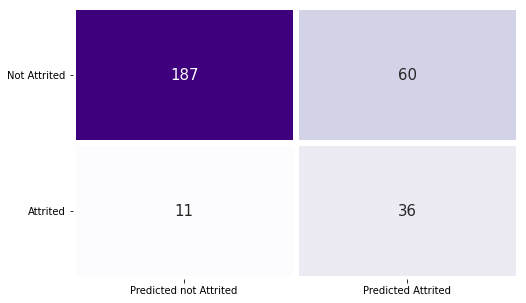

In [63]:
plot.figure(figsize = (8, 5))
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, cmap = "Purples", annot = True, fmt = "d", linewidths = 5, cbar = False, annot_kws = {"fontsize": 15},
           yticklabels = ["Not Attrited", "Attrited"], xticklabels = ["Predicted not Attrited", "Predicted Attrited"])
plot.yticks(rotation = 0)
plot.show()

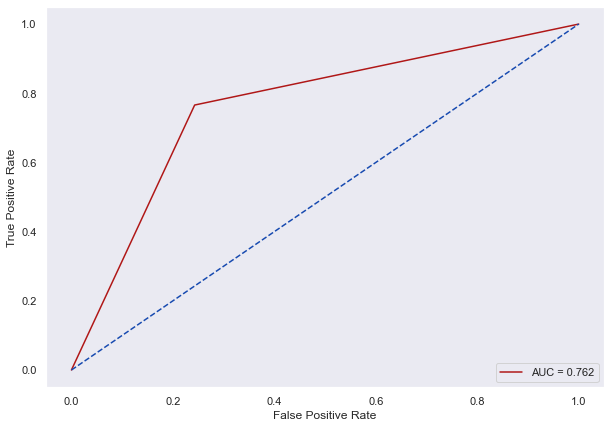

In [64]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = "dark")
plot.figure(figsize = (10, 7))
plot.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plot.axis('tight')
plot.ylabel("True Positive Rate")
plot.xlabel("False Positive Rate")
plot.show()


In [77]:
feat_imp_lr = LogisticRegression(class_weight = {0: 1, 1: 5.21}).fit(X_train, y_train)
importance = feat_imp_lr.coef_[0]
for a,b in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (a,b))


Feature: 0, Score: -0.32839
Feature: 1, Score: -0.49630
Feature: 2, Score: -0.13374
Feature: 3, Score: -1.54200
Feature: 4, Score: -0.43116
Feature: 5, Score: 1.42368
Feature: 6, Score: 0.28814
Feature: 7, Score: 0.09189
Feature: 8, Score: 0.81956
Feature: 9, Score: 1.41589
Feature: 10, Score: 0.26014
Feature: 11, Score: 0.05055
Feature: 12, Score: 0.28304
Feature: 13, Score: -0.11774
Feature: 14, Score: -0.05412
Feature: 15, Score: -0.35962
Feature: 16, Score: -0.48175
Feature: 17, Score: -0.32838
Feature: 18, Score: -0.19731
Feature: 19, Score: -0.51370
Feature: 20, Score: -0.26793


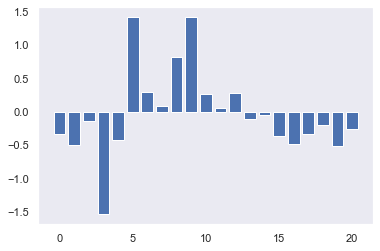

In [78]:
plot.bar([x for x in range(len(importance))], importance)
plot.show()

#### Key Learnings

- Improving quality of code
- More use of loops instead of plotting 1 by 1
- More often then not, the dataset will be imbalanced, need to understand more methods (e.g. SMOTE, oversampling)
- Need to gain a deeper understanding on the parameter for each model for tuning
- Feature importance graph, need to be able to link the feature number to the features


------------------------------------------------------------------------------------- The End -------------------------------------------------------------------------------------